In [35]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [36]:
df = pd.read_csv('housing.csv')

In [37]:
df = df[(df['ocean_proximity']=='<1H OCEAN') | (df['ocean_proximity']=='INLAND')]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [39]:
df.describe()['population']

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [40]:
#  Missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [41]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

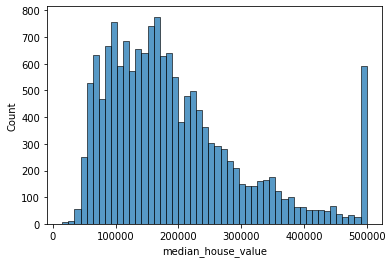

In [42]:
sns.histplot(df.median_house_value, bins=50)

In [43]:
# apply the log function
np.log1p(df.median_house_value)

701      12.973866
830      12.287657
859      12.419574
860      12.554971
861      12.287196
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 15687, dtype: float64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

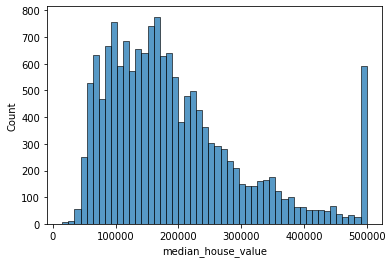

In [44]:
sns.histplot(df.median_house_value, bins=50)

In [45]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [46]:
# Split the train, val, test data

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [47]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [48]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [49]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [50]:
# Shuffle the data randomly

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [51]:
# Shuffle the train, val, test data

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [52]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [53]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0,INLAND
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0,INLAND
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0,<1H OCEAN
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0,INLAND
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0,<1H OCEAN


In [54]:
# fill the missing values with 0

# df['total_bedrooms'].fillna(df.total_bedrooms.mean())
df_train['total_bedrooms'] = df.total_bedrooms.fillna(0)

C:\Users\ACER-PC\AppData\Local\Temp/ipykernel_12212/82497755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['total_bedrooms'] = df.total_bedrooms.fillna(0)


In [56]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [57]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [58]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]